<a href="https://colab.research.google.com/github/Abhay87s/Python-ML-projects/blob/main/Coronary_heart_disease_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparison of Different machine learning** **classifiers**

The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease

Step #1: Data Loading


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set random seed
np.random.seed(42)

# Load csv file
df = pd.read_csv('framingham.csv')

# View top 5 rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Step #2: Exploratory Data Analysis

Text(0.5, 1.0, 'Male/Female Ratio')

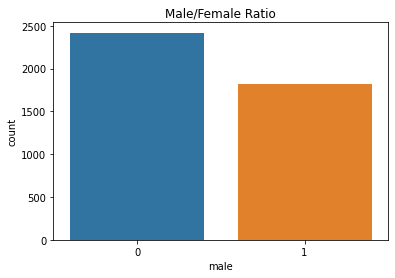

In [ ]:
# Visualize male/female ratio
sns.countplot(x=df["male"]).set_title("Male/Female Ratio")



According to the plot above, the Framingham Heart Study contains more data points corresponding to women than to men.

Text(0.5, 1.0, 'Outcome Count')

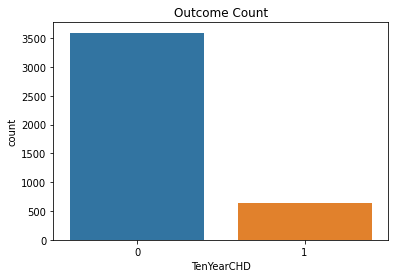

In [ ]:
# Visualize the classes distributions
sns.countplot(x=df["TenYearCHD"]).set_title("Outcome Count")

The plot above reveals that the Framingham Heart Study is a heavily unbalanced data set. Most of the data points correspond to a negative class (i.e. low risk of developing a cardiovascular disease in ten years). Further data balancing will be necessary to address this issue.

Text(0.5, 1.0, 'Outcome Count by Gender')

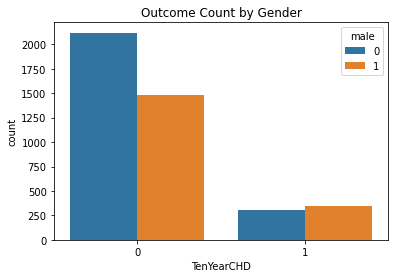

In [ ]:
# Visualize the classes distributions by gender
sns.countplot(x="TenYearCHD", hue="male", data=df).set_title('Outcome Count by Gender')

Even though the total number of data points corresponding to men was lower, the plot above suggests that the risk of developing a cardiovascular disease on men is higher than on women.

Step #3: Data Cleaning

In [ ]:
# Check if there are any null values
df.isnull().values.any()

# Remove null values
df = df.dropna()

# Check if there are any null values
df.isnull().values.any()

False

Step #4: Data Balancing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Balanced Data Set')

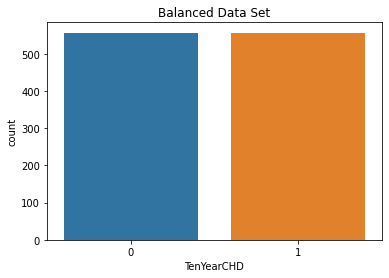

In [ ]:

# Specify features columns
X = df.drop(columns="TenYearCHD", axis=0)

# Specify target column
y = df["TenYearCHD"]

# Import required library for resampling
from imblearn.under_sampling import RandomUnderSampler

# Instantiate Random Under Sampler
rus = RandomUnderSampler(random_state=42)

# Perform random under sampling
df_data, df_target = rus.fit_resample(X, y)

# Visualize new classes distributions
sns.countplot(df_target).set_title('Balanced Data Set')

The plot above shows an equal number of classes is equal after having used the Random Under Sampling technique to balance the data set.

Step #5: Models Building and Performance Evaluation

In [ ]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(df_data, df_target, 5)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.649901,0.652604,0.546681,0.636472,0.597891,Support Vector Classifier
Precision,0.648695,0.649004,0.550277,0.640401,0.717736,Gaussian Naive Bayes
Recall,0.658912,0.667889,0.511647,0.626464,0.323214,Support Vector Classifier
F1 Score,0.653293,0.658000,0.530218,0.632919,0.441818,Support Vector Classifier


**Conclusion**

We can see from results that SVM has performed the best.On the other hand we can see that Decision Tree and Gaussian Naive Bayes performed poor for this data set.

Reference

https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset